In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('recipes_muffins_cupcakes.xls')

In [3]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           20 non-null     object
 1   Flour          20 non-null     int64 
 2   Milk           20 non-null     int64 
 3   Sugar          20 non-null     int64 
 4   Butter         20 non-null     int64 
 5   Egg            20 non-null     int64 
 6   Baking Powder  20 non-null     int64 
 7   Vanilla        20 non-null     int64 
 8   Salt           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [5]:
df.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [6]:
df.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,43.900000,18.550000,17.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,7.018022,6.801509,7.538672,4.801316,3.019237,0.732695,0.512989,0.0
min,34.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,38.000000,15.000000,12.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,43.500000,17.000000,17.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,50.000000,24.250000,23.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,55.000000,28.000000,31.000000,20.000000,14.000000,3.000000,1.000000,0.0


In [7]:
df.corr()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Flour,1.000000,0.653965,-0.823497,-0.663835,-0.612530,0.333677,-0.584768,NaN
Milk,0.653965,1.000000,-0.756611,-0.773610,-0.677137,0.387600,-0.399741,NaN
Sugar,-0.823497,-0.756611,1.000000,0.449314,0.443047,-0.482146,0.394677,NaN
Butter,-0.663835,-0.773610,0.449314,1.000000,0.511927,-0.194494,0.448743,NaN
Egg,-0.612530,-0.677137,0.443047,0.511927,1.000000,-0.290259,0.475739,NaN
Baking Powder,0.333677,0.387600,-0.482146,-0.194494,-0.290259,1.000000,-0.140028,NaN
Vanilla,-0.584768,-0.399741,0.394677,0.448743,0.475739,-0.140028,1.000000,NaN
Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(20, 9)

In [9]:
df.columns

Index(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'],
      dtype='object')

<AxesSubplot:xlabel='Flour', ylabel='count'>

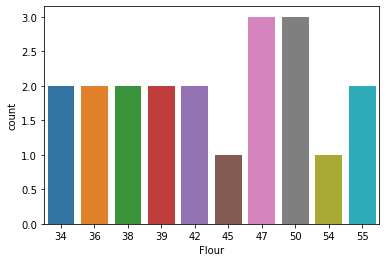

In [10]:
#visualize and analyse the data in graphical format
sns.countplot(x='Flour', data=df)

<AxesSubplot:xlabel='Sugar', ylabel='count'>

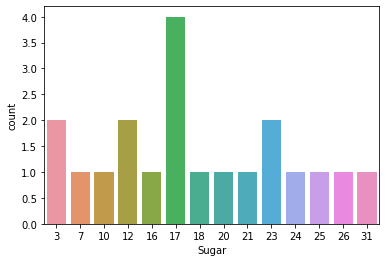

In [11]:
sns.countplot(x='Sugar', data=df)

In [16]:
#give the input variable x and output variable as y
x=df[['Flour','Sugar']]
y=np.where(df['Type']=='Muffin', 0, 1)`

In [17]:
#fit the svm model
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x,y)

SVC(kernel='linear')

In [20]:
#Get the separating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]/ w[1])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


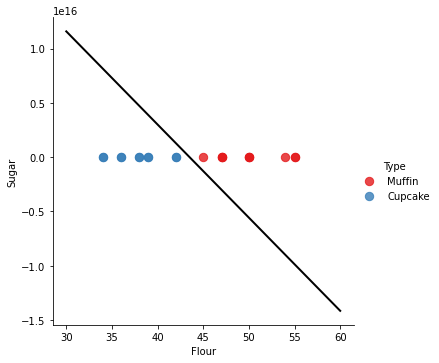

In [24]:
#plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')

In [25]:
#plot the parallels to the separating hyperplane that pass through the support 
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])

b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


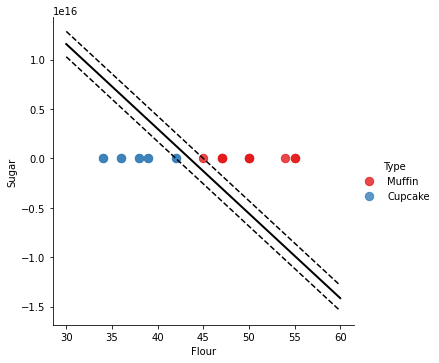

In [27]:
# look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,-1], s=80, facecolors='none')

In [28]:
#create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('you\'re looking at a muffin recipe!')
    else:
        print('you\'re looking at a cupcake recipe!')

In [29]:
#predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

you're looking at a muffin recipe!


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


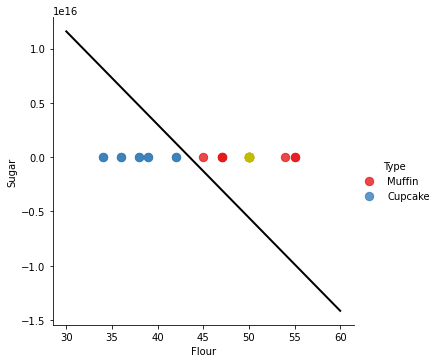

In [30]:
#plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50,20, 'yo', markersize='9')

In [31]:
#predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

you're looking at a cupcake recipe!


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


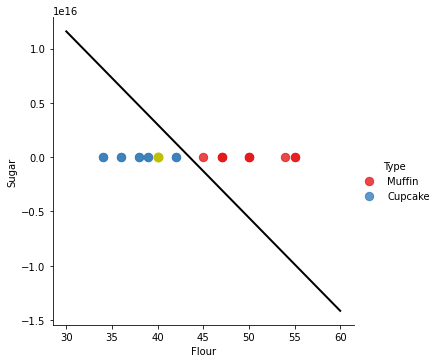

In [32]:
#plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40,20, 'yo', markersize='9')